In [709]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.constants import k

plt.rcParams["axes.grid"] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 14

In [710]:
data = np.loadtxt("forceTest.csv", dtype = "double", delimiter = ",")

posX1 = data[:,0]
posX2 = data[:,3]

momX1 = data[:,6]
momX2 = data[:,9]

time = data[:,-1]



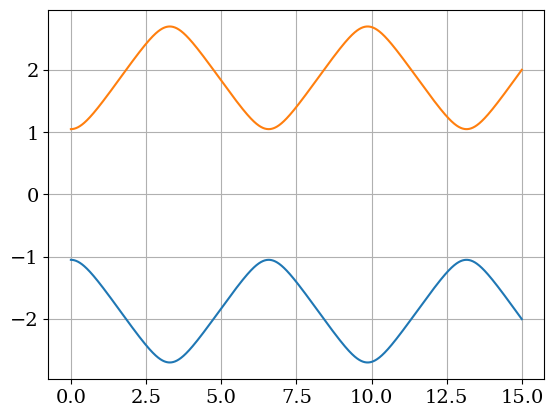

In [711]:
fig, ax = plt.subplots()

start = 0
plotVar = 5000

ax.plot(time[start:plotVar], posX1[start:plotVar])
ax.plot(time[start:plotVar], posX2[start:plotVar])

#ax.plot(time[start:plotVar], abs(posX1[start:plotVar] - posX2[start:plotVar]))

In [712]:
abs(posX1[26] - posX2[26]), abs(posX1[27] - posX2[27])

(2.10702, 2.10756)

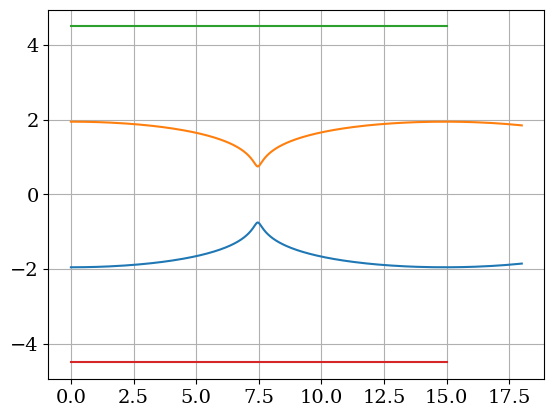

In [713]:
Energytest = np.loadtxt("Energytest.csv", dtype = "double", delimiter = ",")

step_stop = 6000

plt.plot(Energytest[:step_stop,0], Energytest[:step_stop,3])
plt.plot(Energytest[:step_stop,0], Energytest[:step_stop,4])
plt.plot([0, 15], [4.5,4.5])
plt.plot([0, 15], [-4.5,-4.5])

#plt.plot(Energytest[:step_stop,0], Energytest[:step_stop,3] - Energytest[:step_stop,4])

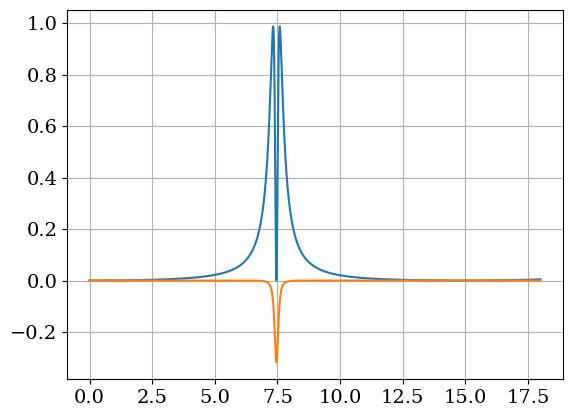

In [714]:
plt.plot(Energytest[:step_stop,0], Energytest[:step_stop,1])
plt.plot(Energytest[:step_stop,0], Energytest[:step_stop,2])
#plt.plot(Energytest[:step_stop,0], Energytest[:step_stop,1] + Energytest[:step_stop,2])

In [715]:
Energytest64 = np.loadtxt("Energy61a.csv", dtype = "double", delimiter = ",")

time61a = Energytest64[:,0]
Ekin61a = Energytest64[:,1]
Epot61a = Energytest64[:,2]

dt = time[1] - time[0]


def timeAverage(data, t, start = 0):
    return np.cumsum(data[start:] *dt)/(t[start:]+dt)

def fluctuations(obser, ti, start):
    firstMoment2 = timeAverage(obser, ti, start)**2
    secondMoment = timeAverage(obser**2, ti, start)
    return secondMoment - firstMoment2

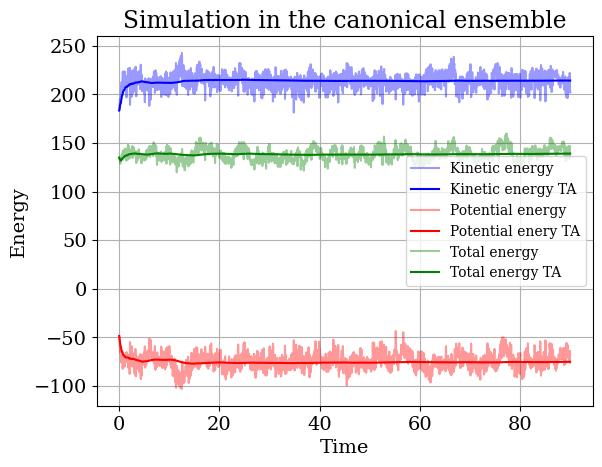

In [716]:
averageKin = timeAverage(Ekin61a, time61a)
averagePot = timeAverage(Epot61a, time61a)
averagetotal = timeAverage(Ekin61a + Epot61a, time61a)

step_stop = 60000

fig, ax = plt.subplots()

ax.plot(Energytest64[:step_stop,0], Energytest64[:step_stop,1], alpha = 0.4, color = "blue", label = "Kinetic energy")
ax.plot(time61a, averageKin, color = "blue", label = "Kinetic energy TA")
ax.plot(Energytest64[:step_stop,0], Energytest64[:step_stop,2], alpha = 0.4, color = "red", label = "Potential energy")
ax.plot(time61a, averagePot, color = "red", label = "Potential enery TA")
ax.plot(Energytest64[:step_stop,0], Energytest64[:step_stop,1] + Energytest64[:step_stop,2], alpha = 0.4, color = "green", label = "Total energy")
ax.plot(time61a, averagetotal, color = "green", label = "Total energy TA")

ax.set(title = "Simulation in the canonical ensemble", xlabel = "Time", ylabel = "Energy")
ax.legend(fontsize="10")

In [717]:
flucEkin = fluctuations(Ekin61a, time61a, 0)
flucEpot = fluctuations(Epot61a, time61a, 0)

flucEkin[-1], flucEpot[-1]

(54.44059570378158, 60.264615123823205)

In [718]:
timeAverage(Ekin61a, time61a)[-1], timeAverage(Epot61a, time61a)[-1]

(214.068841833333, -75.00131107666662)

In [719]:
fluc1Ekin = Ekin61a - timeAverage(Ekin61a, time61a)

normalisedFluc = timeAverage(fluc1Ekin/Ekin61a, time61a)


cv = k*3/2*(1-3/2*64*normalisedFluc)**(-1)

cv[-1], cv[-1]/k #This is the answer to 6.1a)

(2.3892297940461446e-23, 1.7305120954320354)

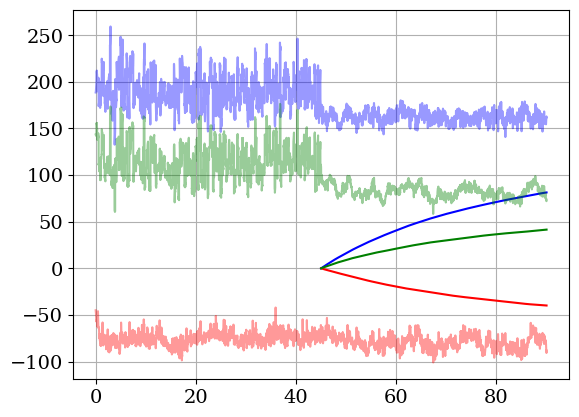

In [725]:
Energy61b = np.loadtxt("Energy61b.csv", dtype = "double", delimiter = ",")

time61b = Energy61b[:,0]
Ekin61b = Energy61b[:,1]
Epot61b = Energy61b[:,2]


half =int(len(time61b)/2)

averageKinb = timeAverage(Ekin61b[half:], time61b[half:] - time61b[half-1])
averagePotb = timeAverage(Epot61b[half:], time61b[half:] - time61b[half-1])
averagetotalb = timeAverage(Ekin61b[half:] + Epot61b[half:], time61b[half:] - time61b[half-1])



step_stop = 60000

fig, ax = plt.subplots()

ax.plot(time61b, Ekin61b, alpha = 0.4, color = "blue", label = "Kinetic energy")
ax.plot(time61b[half:], averageKinb, color = "blue", label = "Kinetic energy TA")

ax.plot(time61b, Epot61b, alpha = 0.4, color = "red", label = "Kinetic energy")
ax.plot(time61b[half:], averagePotb, color = "red", label = "Potential enery TA")

ax.plot(time61b, Ekin61b + Epot61b, alpha = 0.4, color = "green", label = "Kinetic energy")
ax.plot(time61b[half:], averagetotalb, color = "green", label = "Total energy TA")



In [722]:
len(time61b)

30000